In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cpath = "/content/drive/My Drive/Study/12th Sem/Data Mining/Lab/24-12-19/"

In [0]:
#load data
data = pd.read_csv(cpath+"titanic_train.csv")
data.head()
#print(data.shape)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [0]:
#value mapping
def value_mapping(data):
    data['sex'] = data['sex'].map({'female' : 0, 'male' : 1})
    print(data['embarked'].value_counts())
    data['embarked'] = data['embarked'].map({'C' : 1, 'Q' : 2, 'S' : 3})
    print(data['ticket'].value_counts())
    data = data.drop(['ticket'],1) # drop tricket for it's less importance
    return data

#data = value_mapping(data)

In [0]:
#missing value treatment
print(data.isna().sum())
data['age'].fillna(data['age'].mean(), inplace = True)
data = data.drop(['name','cabin'],1)
print(data['embarked'].value_counts())
#fill missing value with 3
data['embarked'].fillna(3, inplace = True)
print("\nafter treatment:")
print(data.isna().sum()) 
data.head()


pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
fare          0
cabin       687
embarked      2
survived      0
dtype: int64
3.0    644
1.0    168
2.0     77
Name: embarked, dtype: int64

after treatment:
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
survived    0
dtype: int64


,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,1,22.0,1,0,7.2500,3.0,0
1,1,0,38.0,1,0,71.2833,1.0,1
2,3,0,26.0,0,0,7.9250,3.0,1
3,1,0,35.0,1,0,53.1000,3.0,1
4,3,1,35.0,0,0,8.0500,3.0,0


In [0]:
#separating features and target
x = np.array(data.drop(['survived'],1)) # axis 1 denotes columns axis 0 denotes rows
y = np.array(data['survived'])

In [0]:
#spliting traing and test set
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
#x = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
#print(y_train)

In [0]:
#applying random forest
from sklearn.ensemble import RandomForestClassifier
accuracy_ls = []
n_es = []
for i in range(1,51):
    clf = RandomForestClassifier(n_estimators=i, random_state=42)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    print("{}    {}".format(accuracy, i))
    accuracy_ls.append(accuracy)
    n_es.append(i)

73.13432835820896    1
78.35820895522389    2
79.1044776119403    3
82.08955223880598    4
80.59701492537313    5
80.97014925373134    6
79.1044776119403    7
82.08955223880598    8
81.71641791044776    9
81.71641791044776    10
80.97014925373134    11
80.22388059701493    12
80.59701492537313    13
81.71641791044776    14
80.97014925373134    15
81.71641791044776    16
81.71641791044776    17
82.08955223880598    18
81.34328358208955    19
80.97014925373134    20
81.34328358208955    21
81.71641791044776    22
81.34328358208955    23
81.34328358208955    24
80.59701492537313    25
81.34328358208955    26
81.34328358208955    27
81.34328358208955    28
80.97014925373134    29
80.97014925373134    30
80.97014925373134    31
81.34328358208955    32
80.97014925373134    33
80.59701492537313    34
80.97014925373134    35
80.97014925373134    36
80.97014925373134    37
80.97014925373134    38
80.59701492537313    39
80.97014925373134    40
80.97014925373134    41
80.97014925373134    42
80.

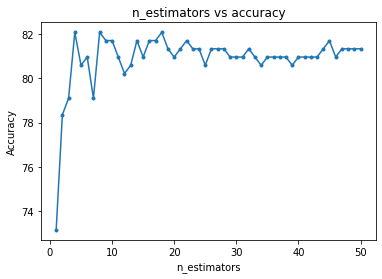

In [0]:
#plotting accuracy va n_estimators
import matplotlib.pyplot as plt
plt.plot(n_es, accuracy_ls, marker='.')
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("n_estimators vs accuracy")
plt.show()

In [108]:
#making model prepare testdata for kaggle
fclf = RandomForestClassifier(n_estimators=27, random_state=42)
fclf.fit(x_train, y_train)

tstdata = pd.read_csv(cpath+'titanic_test.csv')
tstdata = tstdata.drop(['name','cabin'],1)
tstdata = value_mapping(tstdata)
print(tstdata.isna().sum())
tstdata['age'].fillna(tstdata['age'].mean(), inplace = True)
tstdata['fare'].fillna(tstdata['fare'].mean(), inplace = True)
print(tstdata.isna().sum())
tstdata.head()




S    270
C    102
Q     46
Name: embarked, dtype: int64
PC 17608              5
113503                4
CA. 2343              4
220845                3
SOTON/O.Q. 3101315    3
                     ..
2653                  1
11765                 1
C.A. 15185            1
350054                1
240261                1
Name: ticket, Length: 363, dtype: int64
passengerId     0
pclass          0
sex             0
age            86
sibsp           0
parch           0
fare            1
embarked        0
dtype: int64
passengerId    0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
dtype: int64


,passengerId,pclass,sex,age,sibsp,parch,fare,embarked
0,892,3,1,34.5,0,0,7.8292,2
1,893,3,0,47.0,1,0,7.0000,3
2,894,2,1,62.0,0,0,9.6875,2
3,895,3,1,27.0,0,0,8.6625,3
4,896,3,0,22.0,1,1,12.2875,3


In [113]:
#making result for kaggle
passengerId = np.array(tstdata['passengerId'])
test_features = np.array(tstdata.drop(['passengerId'],1))

survive = fclf.predict(test_features)
df = pd.DataFrame({'PassengerId':passengerId, 'Survived': survive})
df.to_csv(cpath+"result_randomforest.csv", sep=',', index=False )
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
